In [2]:
import gymnasium as gym
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [6]:
env = gym.make("CarRacing-v3",max_episode_steps=1)  # 'rgb_array' for image-only
obs = env.reset()[0]


for _ in range(200):
    # Convert to grayscale
    img = cv2.cvtColor(obs, cv2.COLOR_RGB2GRAY)

    # Edge detection
    edges = cv2.Canny(img, 50, 150)

    # Region of interest (lower half)
    mask = np.zeros_like(edges)
    height, width = edges.shape
    mask[int(height/2):, :] = 255
    roi_edges = cv2.bitwise_and(edges, mask)

    # Hough line detection
    lines = cv2.HoughLinesP(roi_edges, 1, np.pi/180, threshold=50, minLineLength=10, maxLineGap=20)

    # Steering based on lines
    steering = calculate_steering_angle(lines, width)
    action = np.array([steering, 1.0, 0.0])  # steer, gas, brake

    # Take action
    obs, reward, done, truncated, info = env.step(action)

    # Optionally show frame with lines
    line_img = obs.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    cv2.imshow("Lane Detection", line_img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cv2.destroyAllWindows()


(96, 96)


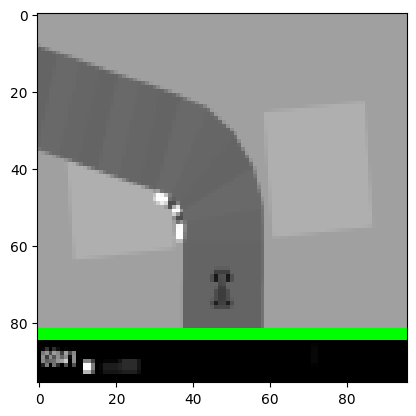

In [ ]:
env = gym.make("CarRacing-v3",max_episode_steps=1)  # 'rgb_array' for image-only
obs = env.reset()[0]

for _ in range(70):
    action = np.array([0.0, 1.0, 0.0])
    obs, reward, done, truncated, info = env.step(action)

# Converting to grayscale
img = cv2.cvtColor(obs,cv2.COLOR_RGB2GRAY)
# img_bgr = cv2.cvtColor(obs,cv2.COLOR_BGR2GRAY)

# Applying Canny edge detection
edges = cv2.Canny(img,threshold1=10,threshold2=100)

# print(img.shape)

print(edges.shape)

height,width = edges.shape

mask = np.zeros_like(edges)

mask[int(height/2):,:] = 255

# lower half
roi_edges = cv2.bitwise_and(edges,mask)

# find lines
lines = cv2.HoughLinesP(roi_edges, 1, np.pi/180, threshold=50, minLineLength=10, maxLineGap=20)
line_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(line_img)
plt.show()


# plt.figure(figsize=(10, 10)) 

# plt.subplot(1, 2, 1)
# plt.title("Original")
# plt.imshow(obs)

# plt.subplot(1, 2, 2)
# plt.title("Modified")
# plt.imshow(roi_edges, cmap='gray')

# plt.show()


In [5]:
def calculate_steering_angle(lines, img_width):
    if lines is None:
        return 0.0  # go straight if no lines

    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        dx = x2 - x1
        dy = y2 - y1
        if dx == 0:
            continue  # skip vertical lines
        angle = np.arctan2(dy, dx)
        angles.append(angle)

    if len(angles) == 0:
        return 0.0

    average_angle = np.mean(angles)

    # Normalize steering angle (this part is heuristic!)
    steering = np.clip(-average_angle / np.pi, -1.0, 1.0)
    return steering
